# BigMart Sales Prediction Analysis - Regression

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities.

Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key roles increasing sales

Variable | Description
----------|--------------
Item_Identifier | Unique product ID
Item_Weight | Weight of product
Item_Fat_Content | Whether the product is low fat or not
Item_Visibility | The % of total display area of all products in a    store allocated to the particular product
Item_Type | The category to which the product belongs
Item_MRP | Maximum Retail Price (list price) of the product
Outlet_Identifier | Unique store ID
Outlet_Establishment_Year | The year in which store was established
Outlet_Size | The size of the store in terms of ground area covered
Outlet_Location_Type | The type of city in which the store is located
Outlet_Type | Whether the outlet is just a grocery store or some sort of supermarket
Item_Outlet_Sales | Sales of the product in the particular store. This is the outcome variable to be predicted.

Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

Loading the dataset

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Exploratory Data Analysis

In [3]:
#statistical info on dataset (numerical)

df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
#statistical info on categorical columns

df.describe(include=['object'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [5]:
#data types and non-null value counts of data columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

### Preprocessing dataset

In [7]:
#check for null values

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# check for categorical attributes

df.dtypes[df.dtypes == 'object']

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [9]:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
#print the categorical columns:
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Identifier
FDG33    10
FDW13    10
NCB18     9
FDV38     9
FDW26     9
         ..
FDN52     1
FDK57     1
FDQ60     1
FDO33     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
O

###### FILL THE MISSING VALUES

Item Weight missing values

In [11]:
item_weight_mean = df.pivot_table(values='Item_Weight', index='Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [12]:
item_weight = df.groupby('Item_Identifier')[['Item_Weight']].mean()
item_weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [13]:
# getting all rows with missing values of Item Weight#FILL THE MISSING VALUES

miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [14]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = df['Item_Weight'].mean()

In [15]:
df.Item_Weight.isnull().sum()

0

In [16]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##### Outlet Size missing values

In [17]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [18]:
df.Outlet_Size.isnull().sum()

2410

In [19]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [20]:
miss_bool = df.Outlet_Size.isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [21]:
df.Outlet_Size.isnull().sum()

0

Item Visibility - replacing all 0s with mean Item Visibility

In [22]:
sum(df.Item_Visibility == 0)

526

In [23]:
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [24]:
sum(df.Item_Visibility == 0)

0

Item Fat Content values

In [25]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [26]:
# combine item fat content

df.Item_Fat_Content = df.Item_Fat_Content.replace({'LF':'Low Fat',
                                                  'reg': 'Regular',
                                                  'low fat': 'Low Fat'})
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Create New Attributes

In [27]:
# creating new column of Item Identify to group items into categories

df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [28]:
# changing values codes to meaning values

df['New_Item_Type'] = df['New_Item_Type'].map({'FD': 'Food',
                                              'NC': 'Non-Consumable',
                                              'DR': 'Drinks'})
df.New_Item_Type.value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [29]:
df.loc[df['New_Item_Type'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df.Item_Fat_Content.value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

Create small values for establishment year

Subtract 2013(year data was collected)

In [30]:
df['Outlet_Years'] = 2013 - df.Outlet_Establishment_Year
df.Outlet_Years

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [31]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


#### Exploratory Data Analysis

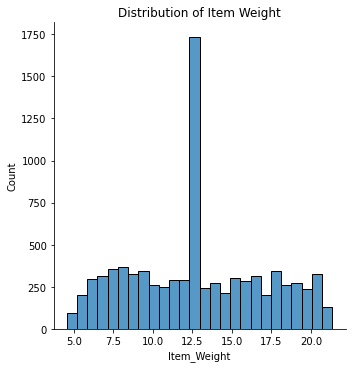

In [32]:
sns.displot(df['Item_Weight'])
plt.title('Distribution of Item Weight')
plt.show()

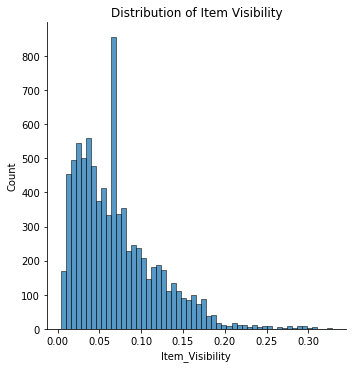

In [33]:
sns.displot(df['Item_Visibility'])
plt.title('Distribution of Item Visibility')
plt.show()

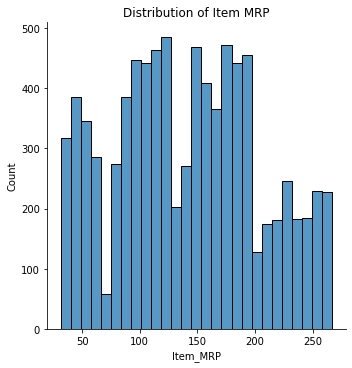

In [34]:
sns.displot(df['Item_MRP'])
plt.title('Distribution of Item MRP')
plt.show()

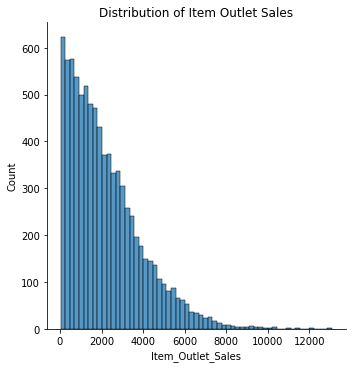

In [35]:
sns.displot(df['Item_Outlet_Sales'])
plt.title('Distribution of Item Outlet Sales')
plt.show()

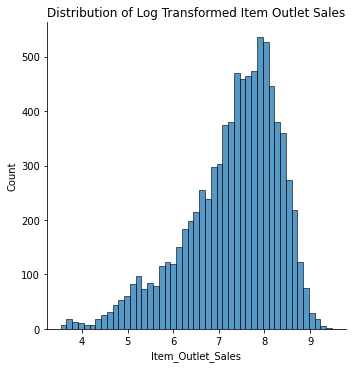

In [36]:
sns.displot(np.log(1+df['Item_Outlet_Sales']))
plt.title('Distribution of Log Transformed Item Outlet Sales')
plt.show()

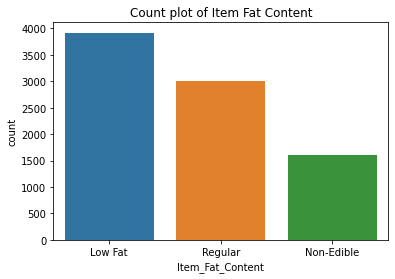

In [37]:
sns.countplot(df.Item_Fat_Content)
plt.title('Count plot of Item Fat Content')
plt.show()

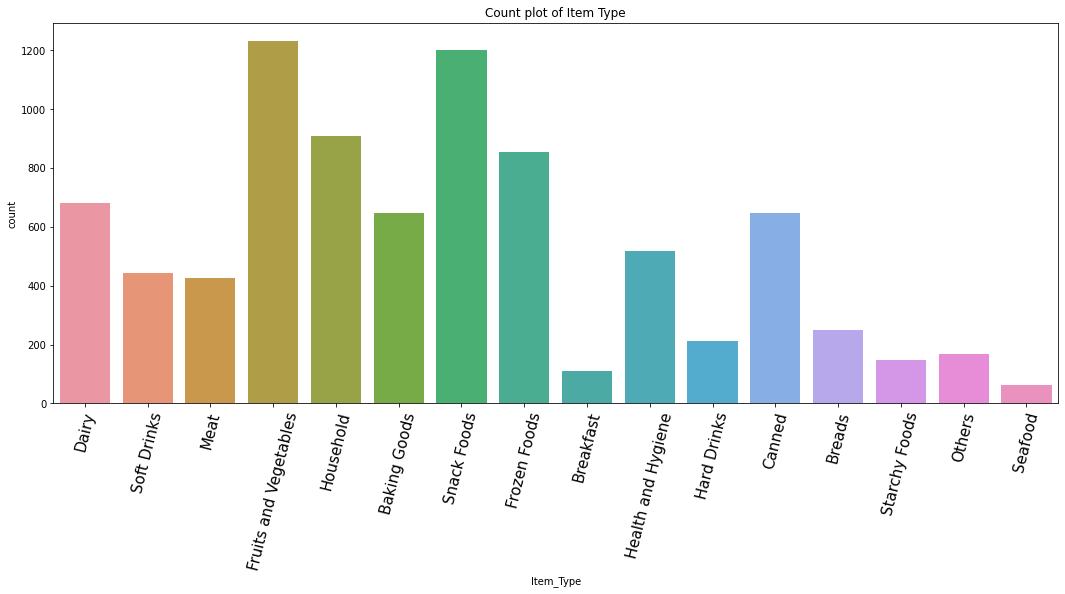

In [38]:
fig = plt.figure(figsize=(18, 7))
sns.countplot(df.Item_Type)
plt.title('Count plot of Item Type')
plt.xticks(rotation=76, fontsize=15)
plt.show()

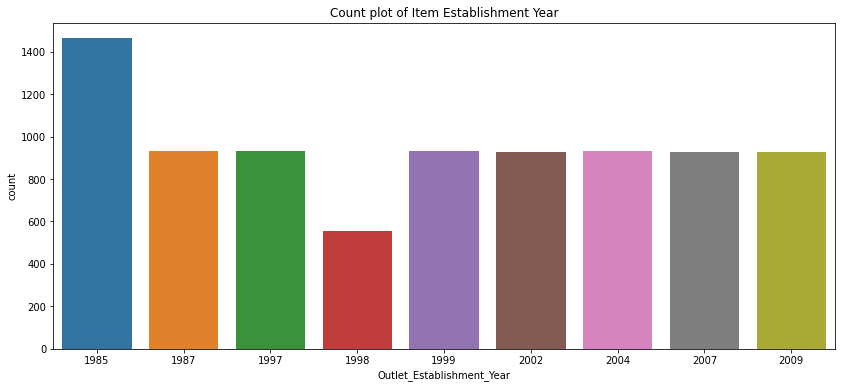

In [39]:
fig = plt.figure(figsize=(14, 6))
sns.countplot(df.Outlet_Establishment_Year)
plt.title('Count plot of Item Establishment Year')
plt.show()

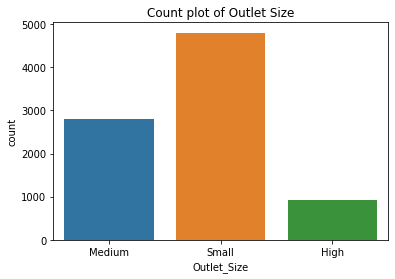

In [40]:
sns.countplot(df.Outlet_Size)
plt.title('Count plot of Outlet Size')
plt.show()

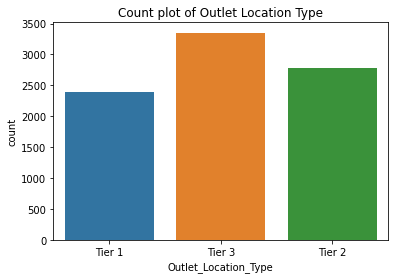

In [41]:
sns.countplot(df.Outlet_Location_Type)
plt.title('Count plot of Outlet Location Type')
plt.show()

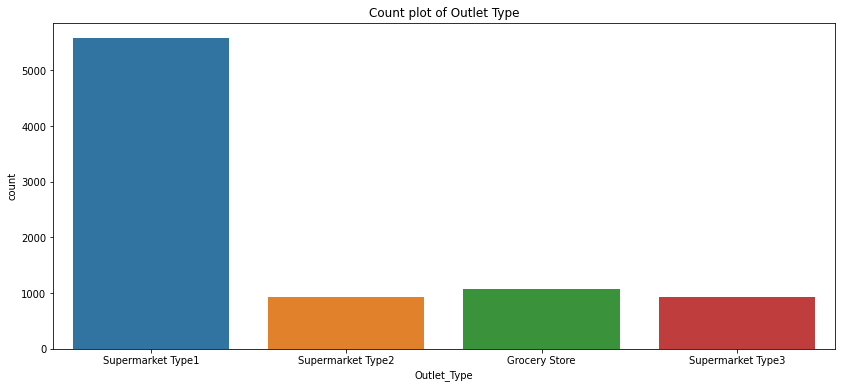

In [42]:
fig = plt.figure(figsize=(14, 6))
sns.countplot(df.Outlet_Type)
plt.title('Count plot of Outlet Type')
plt.show()

#### Correlation Matrix

In [43]:
corr = df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.017450,0.024756,-0.008301,0.011550,0.008301
Item_Visibility,-0.017450,1.000000,-0.005259,-0.078355,-0.134138,0.078355
Item_MRP,0.024756,-0.005259,1.000000,0.005020,0.567574,-0.005020
Outlet_Establishment_Year,-0.008301,-0.078355,0.005020,1.000000,-0.049135,-1.000000
Item_Outlet_Sales,0.011550,-0.134138,0.567574,-0.049135,1.000000,0.049135
Outlet_Years,0.008301,0.078355,-0.005020,-1.000000,0.049135,1.000000


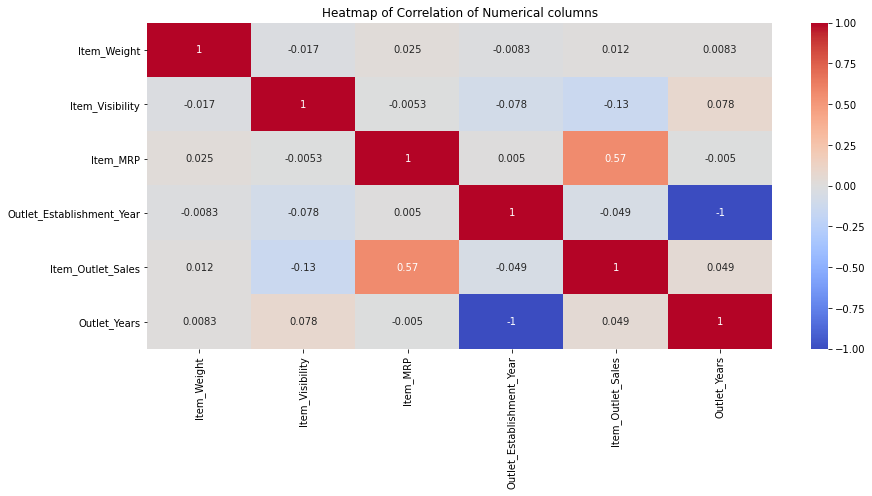

In [44]:
fig = plt.figure(figsize=(14, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation of Numerical columns')
plt.show()

#### Label Encoding

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [46]:
df['Outlet'] = le.fit_transform(df.Outlet_Identifier)
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [47]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,1,14,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,0,4,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,1,14,9
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,1998,2,2,0,732.3800,1,15,0
4,NCD19,8.93,1,0.066132,9,53.8614,OUT013,1987,0,2,1,994.7052,2,26,1


In [48]:
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
0    3918
2    3006
1    1599
Name: Item_Fat_Content, dtype: int64

Item_Type
6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64

Outlet_Size
2    4798
1    2793
0     932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64

New_Item_Type
1    6125
2    1599
0     799
Name: New_Item_Type, dtype: int64



#### Onehot Encoding

In [49]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,3735.1380,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,443.4228,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,2097.2700,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,732.3800,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,994.7052,26,1,...,0,0,1,0,1,0,0,0,0,1


#### Predictors/Target Split

In [50]:
X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [51]:
X.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,9.30,0.016047,4,249.8092,14,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,14,48.2692,4,3,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,10,141.6180,14,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.066132,6,182.0950,15,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.066132,9,53.8614,26,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1


##### Train/Test split

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Linear Model

In [53]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [54]:
# model without normalize

linear = LinearRegression(normalize=False).fit(X_train, y_train)
print('train score', linear.score(X_train, y_train))
print('test score', linear.score(X_test, y_test))

train score 0.5600560901762381
test score 0.569679799169299


In [55]:
# model with normalize

linear2 = LinearRegression(normalize=True).fit(X_train, y_train)
print('train score', linear2.score(X_train, y_train))
print('test score', linear2.score(X_test, y_test))

train score 0.5598886602200923
test score 0.5689316786538892


Models Evaluation

In [56]:
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
#prediction for linear without normalization
pred = linear.predict(X_test)

# The coefficients
print('Coefficients: \n', linear.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, pred))


Coefficients: 
 [-1.91436010e+00 -4.56029976e+02  9.31900028e-01  1.57845062e+01
 -1.53895596e+02  1.23254386e+02 -3.67334166e+01 -1.89285024e+00
  3.86262669e+01  2.77383189e+03 -1.53922628e+03 -1.23460561e+03
  7.39072090e+02  4.05303392e+01 -7.79602429e+02 -1.12670076e+03
 -1.56562960e+03 -1.22572407e+03  3.91805444e+03 -1.23124843e+01
  1.42053346e+01 -1.89285024e+00]
Mean squared error: 1205324.10
Coefficient of determination: 0.57


In [58]:
#prediction for linear with normalization
pred = linear2.predict(X_test)

# The coefficients
print('Coefficients: \n', linear2.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, pred))

Coefficients: 
 [-2.23732156e+00 -3.57091588e+02  1.34907626e+00  1.58306973e+01
 -1.53414957e+02  1.26903670e+02 -1.57725437e+16 -5.93697052e+15
 -1.57725437e+16 -1.57665355e+16 -1.57665355e+16 -1.57665355e+16
 -2.92304050e+16 -2.92304050e+16 -2.92304050e+16  1.29907446e+15
  1.29907446e+15  1.29907446e+15  1.29907446e+15  4.80904045e+15
  4.80904045e+15 -5.02653273e+15]
Mean squared error: 1207419.58
Coefficient of determination: 0.57


#### Ridge Regression

With normalize = True 

In [59]:
ridge = Ridge(normalize=True).fit(X_train, y_train)
print('train score', ridge.score(X_train, y_train))
print('test score', ridge.score(X_test, y_test))

train score 0.4387949350539082
test score 0.4547795248960277


With normalize = True and varying alpha

In [60]:
a = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for a in a:
    ridge2 = Ridge(normalize=True, alpha=a).fit(X_train, y_train)
    print('using alpha: {}'.format(a))
    print('train score', ridge2.score(X_train, y_train))
    print('test score', ridge2.score(X_test, y_test))
    print()

using alpha: 0.1
train score 0.5543303130317057
test score 0.5652293938238856

using alpha: 0.2
train score 0.5442529778203911
test score 0.5567210694741742

using alpha: 0.3
train score 0.5319623041091855
test score 0.545610812653462

using alpha: 0.4
train score 0.518582149357308
test score 0.533087750623005

using alpha: 0.5
train score 0.5047681405614324
test score 0.5198785771040367

using alpha: 0.6
train score 0.490919914054621
test score 0.5064413643622406

using alpha: 0.7
train score 0.4772812902417467
test score 0.4930651358457723

using alpha: 0.8
train score 0.4639983312097935
test score 0.47993038876551597

using alpha: 0.9
train score 0.45115489116477414
test score 0.4671471857056013

using alpha: 1
train score 0.4387949350539082
test score 0.4547795248960277



with no normalize and varying alpha

In [61]:
a = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for a in a:
    ridge3 = Ridge(normalize=False, alpha=a).fit(X_train, y_train)
    print('using alpha: {}'.format(a))
    print('train score', ridge2.score(X_train, y_train))
    print('test score', ridge2.score(X_test, y_test))
    print()

using alpha: 0.1
train score 0.4387949350539082
test score 0.4547795248960277

using alpha: 0.2
train score 0.4387949350539082
test score 0.4547795248960277

using alpha: 0.3
train score 0.4387949350539082
test score 0.4547795248960277

using alpha: 0.4
train score 0.4387949350539082
test score 0.4547795248960277

using alpha: 0.5
train score 0.4387949350539082
test score 0.4547795248960277

using alpha: 0.6
train score 0.4387949350539082
test score 0.4547795248960277

using alpha: 0.7
train score 0.4387949350539082
test score 0.4547795248960277

using alpha: 0.8
train score 0.4387949350539082
test score 0.4547795248960277

using alpha: 0.9
train score 0.4387949350539082
test score 0.4547795248960277

using alpha: 1
train score 0.4387949350539082
test score 0.4547795248960277



#### Decision Tree Regressor

normal raw model with no pruning

In [62]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor().fit(X_train, y_train)
print('train score', dtr.score(X_train, y_train))
print('test score', dtr.score(X_test, y_test))

train score 1.0
test score 0.18284419794461348


pruned Decision tree with varying ccp alpha

In [63]:
a = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for a in a:
    dtr = DecisionTreeRegressor(ccp_alpha=a).fit(X_train, y_train)
    print('using alpha: {}'.format(a))
    print('train score', dtr.score(X_train, y_train))
    print('test score', dtr.score(X_test, y_test))
    print()


using alpha: 0.1
train score 0.9999961376970927
test score 0.1816426221302302

using alpha: 0.2
train score 0.9999899264113894
test score 0.17718120366330303

using alpha: 0.3
train score 0.9999835561364032
test score 0.1918376506527084

using alpha: 0.4
train score 0.9999768118960601
test score 0.17836113368733664

using alpha: 0.5
train score 0.9999699228081883
test score 0.17577745055263783

using alpha: 0.6
train score 0.9999608031498115
test score 0.18398397089863394

using alpha: 0.7
train score 0.9999491507281065
test score 0.18038158244723357

using alpha: 0.8
train score 0.9999382790957636
test score 0.17436501864142573

using alpha: 0.9
train score 0.9999279260751193
test score 0.17716339438345596

using alpha: 1
train score 0.9999131539432934
test score 0.1801198156057363



#### Model Training

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    #train model 
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # performance cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error')
    cv_score = np.abs(np.mean(cv_score))
    print('Model Report')
    print('MSE: ', mean_squared_error(y, pred))
    print('CV Score: ', cv_score)


#### Linear Regression

Model Report
MSE:  1271069.7335797255
CV Score:  1276265.9801985733


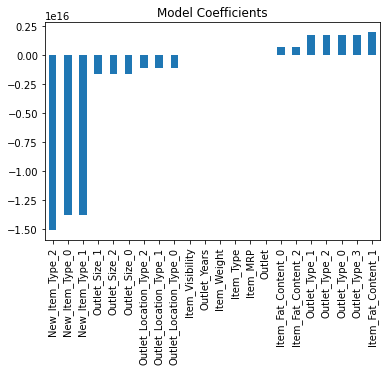

In [65]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')
plt.show()

#### Ridge Regression

Model Report
MSE:  1621884.6809976725
CV Score:  1625215.6089171262


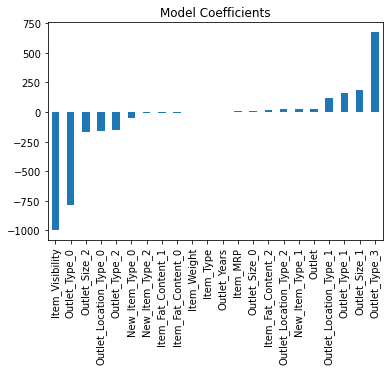

In [66]:
model = Ridge(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')
plt.show()

#### Lasso Regression

Model Report
MSE:  1273297.7591122084
CV Score:  1278126.1092106486


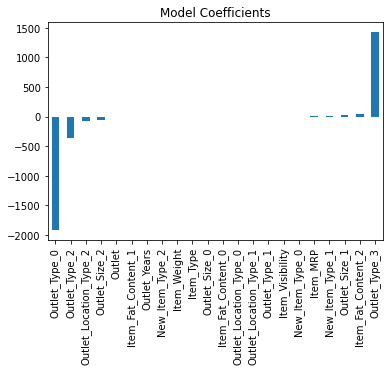

In [67]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')
plt.show()

#### Decision Tree Regressor

Model Report
MSE:  0.0
CV Score:  2448903.2220859556


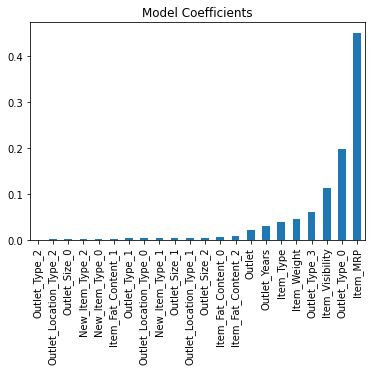

In [68]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')
plt.show()